In [54]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()

matplotlib.style.use('ggplot')

In [75]:
df = pd.read_csv('usage.tsv', sep='\t')
df['base_gene'] = df['v_gene'].apply(lambda v: v.split('|', 1)[0])
df['family'] = df['v_gene'].apply(lambda v: v.split('|', 1)[0].split('-', 1)[0])

def get_df(df, by):
    df = df.pivot_table(columns='base_gene', values=by, index='subject', aggfunc=np.sum)
    df = df.div(df.sum(axis=1), axis=0)
    df = df.sort_index().reindex(sorted(df.columns), axis=1)
    df = df.fillna(0)
    return df

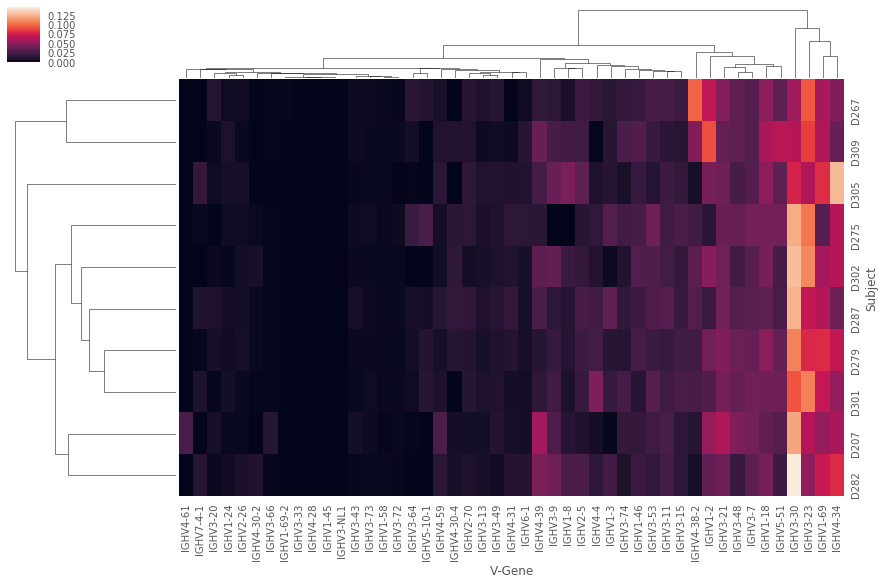

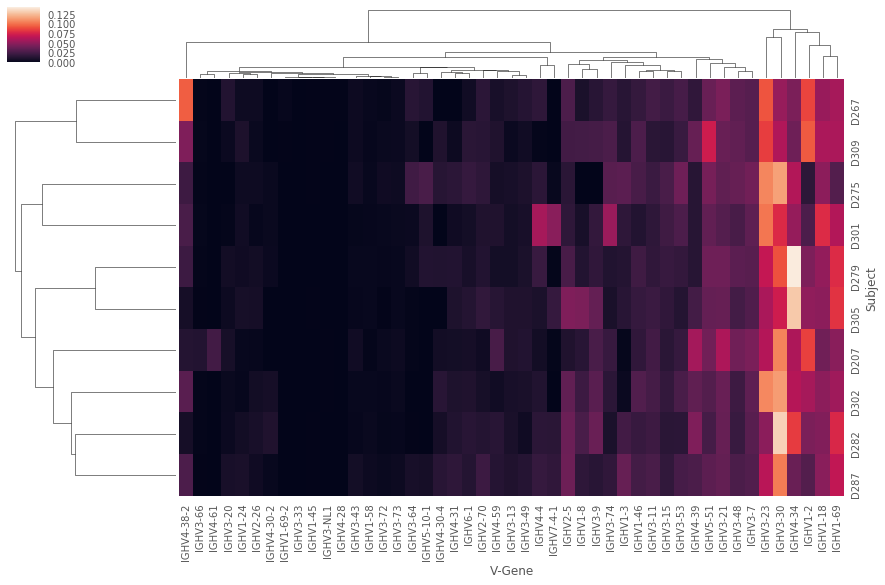

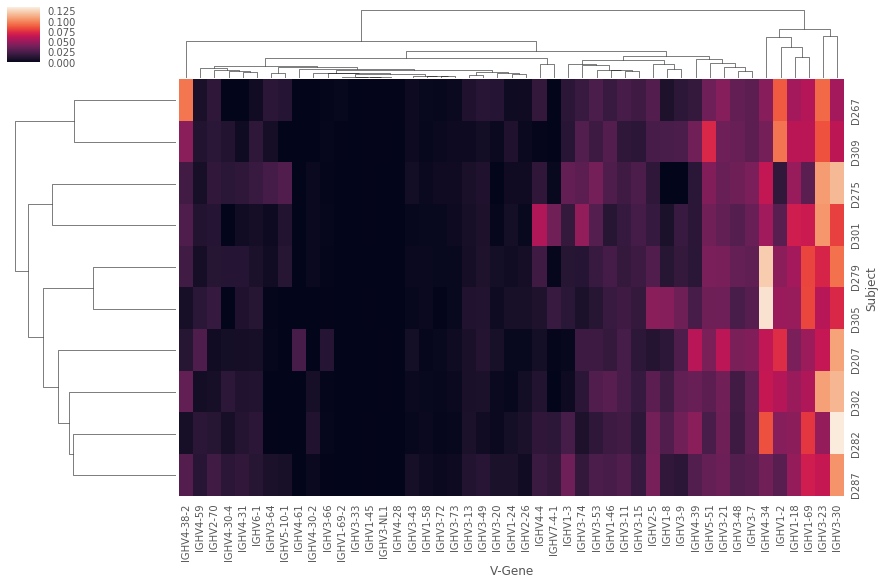

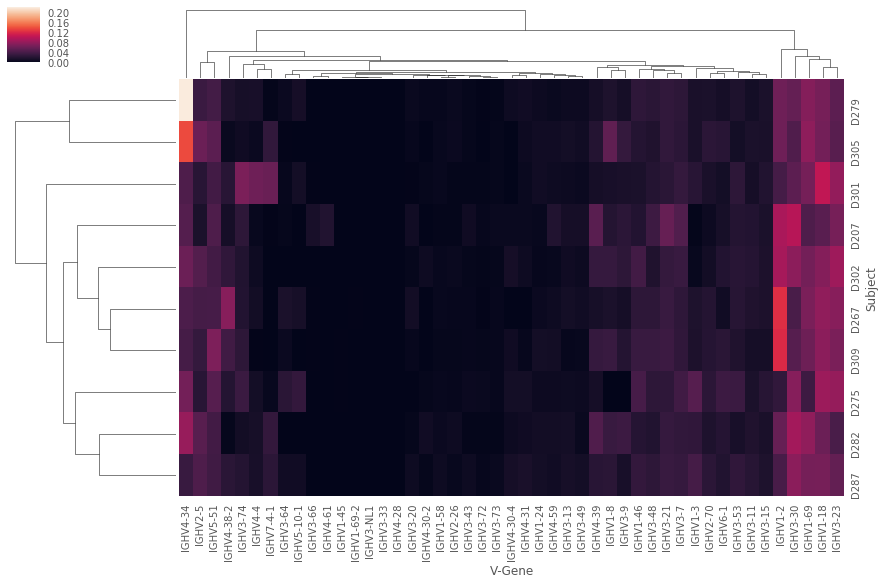

In [87]:
for by in ('clones', 'clones_instances', 'clones_uniques', 'clones_copies'):
    pdf = get_df(df, by)
    g = sns.clustermap(pdf, figsize=(15, 9))
    ax = g.ax_heatmap
    ax.set_xlabel('V-Gene')
    ax.set_ylabel('Subject')
    name = 'v_gene_{}'.format(by.replace('_', '-'))
    pdf.to_csv(name + '.tsv', sep='\t')
    plt.savefig(name + '.pdf', bbox_inches='tight')